# Digital Signal Image Processing Assignment - Fourier Transform

**Riccardo Caprile 4370774**

Description of the assignment : computes the Fourier transform of $$ f(t) = \alpha cos(\omega_0 t) + \beta cos(\omega_1t)$$

Where $\alpha$ and $\beta$ are sampled uniformly in the intervalk [-1,1]

$\omega_0$ is sampled uniformly in the interval [1,5] 

$\omega_1$ is sampled uniformly in the interval [10,20]

Comment the results you obtain in terms of $\delta$ function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

# Uniform Sampling

As before , we uniformly sampled the variable in ther given intervals seen above

In [2]:
a = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)
w0 = np.random.uniform(1,5)
w1 = np.random.uniform(10, 20)

# Let's create the signal f(t)

In [3]:
#Sampling rate in Hz

sampling_r = 1000

#Acquisition time
t_m = np.pi

#Sampling time values
time = np.arange(-t_m,t_m,1/sampling_r)


#Number of samples
print("We consider %d samples"%time.size)


#We can now create the signal f(t) , composed of two different signals g and h
#w0 is the first angular frequency and w1 is the second angular frequency

g = a * np.cos(w0*time)
h = b * np.cos(w1*time)

f = g + h


We consider 6284 samples


# Let's plot the signal f(t)

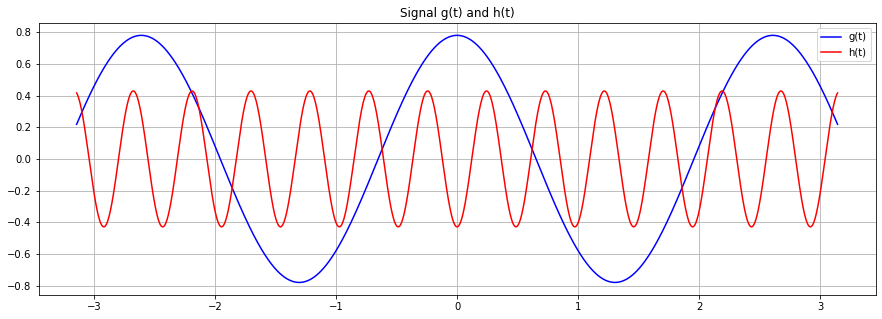

In [4]:
plt.plot(time, g, color='b', label='g(t)')
plt.plot(time, h, color='r', label='h(t)')
plt.grid()
plt.title("Signal g(t) and h(t)")
plt.legend()
plt.show()

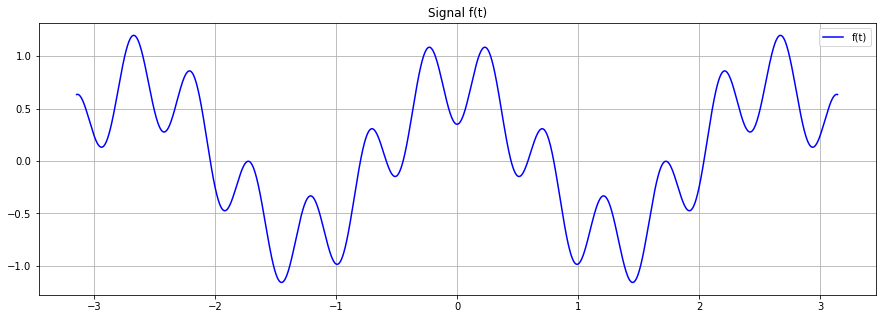

In [5]:
plt.plot(time, f, color='b', label='f(t)')
plt.title("Signal f(t)")
plt.legend()
plt.grid()
plt.show()

# Let's compute the Fourier Transform of f(t)

From time domain to frequency domain. This operation will help us understanding about the composition of the f(t) signal

In [6]:
n = len(time) ## number of samples

## array of fft(y)
fft_f = np.fft.fft(f)

## array of frequencies values
freq = np.fft.fftfreq(n, 1/sampling_r)

C:\Users\ricky\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ricky\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


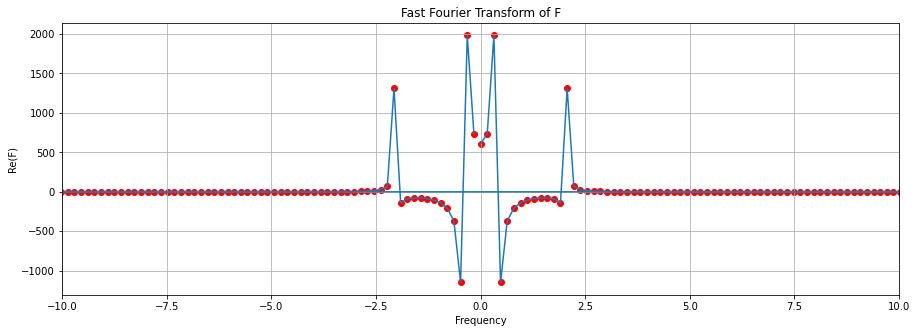

In [7]:
plt.plot(freq, (fft_f))
plt.scatter(freq,(fft_f),color = "r")
plt.xlim(-10, 10)
plt.title("Fast Fourier Transform of F")
plt.xlabel("Frequency")
plt.ylabel("Re(F)")
plt.grid()
plt.show()

# Let's plot the results and comment 


# Real part of F(w)

As expected the real part of the Fourier Transform of the signal considered f(t) is an even function of the frequency. The dirac deltas are in the expected positions

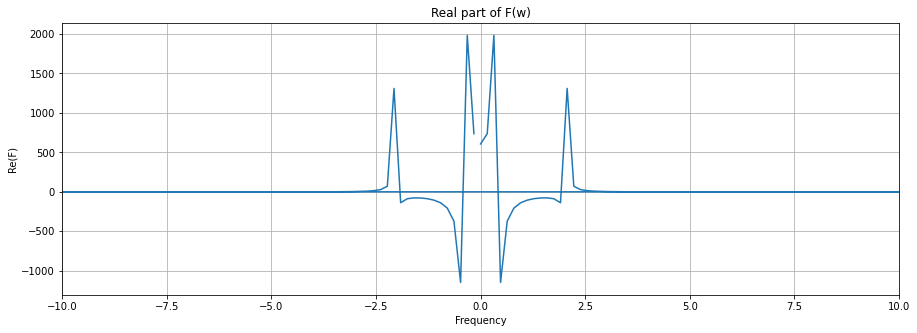

In [8]:
plt.plot(freq, np.real(fft_f))
plt.xlim(-10, 10)
plt.title("Real part of F(w)")
plt.xlabel("Frequency")
plt.ylabel("Re(F)")
plt.grid()
plt.show()

# Imaginary part of F(w)

As expected the imaginary part of the Fourier Transform of the signal considered f(t) is an odd function of the frequency (symmetric with respect to the origin) .  The dirac deltas are in the expected positions

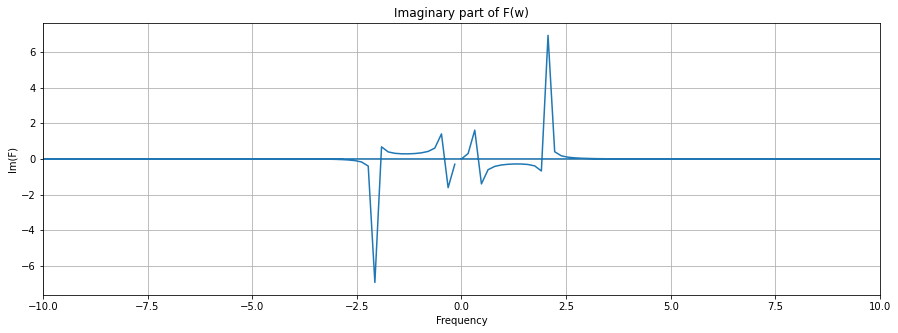

In [9]:
plt.plot(freq, np.imag(fft_f))
plt.xlim(-10, 10)
plt.title("Imaginary part of F(w)")
plt.xlabel("Frequency")
plt.ylabel("Im(F)")
plt.grid()
plt.show()

The Fourier Transform of the signal is the sum of the imaginary part and real part

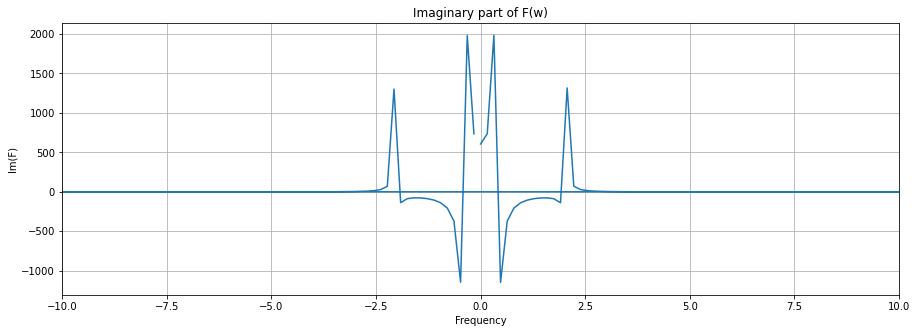

In [10]:
plt.plot(freq, np.imag(fft_f) + np.real(fft_f))
plt.xlim(-10, 10)
plt.title("Imaginary part of F(w)")
plt.xlabel("Frequency")
plt.ylabel("Im(F)")
plt.grid()
plt.show()

# Module of F(w)

The module of the Fourier Transform is also known as "power spectrum". It tells how much of the signal is captured at the angular frequency w. 

When the input signal is real , the negative frequency components are the complex conjugate of the positive frequency components and they contain the same information of the positive part.

With the plot we can see that the signal is composed of two different signals with two different angular frequencies.

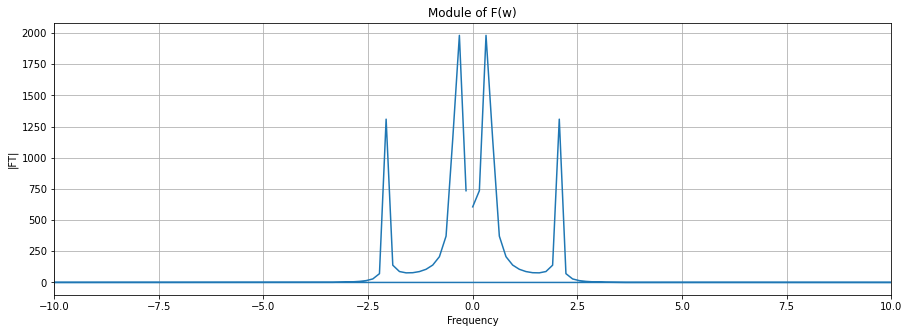

In [11]:
plt.plot(freq, np.abs(fft_f))
plt.xlim(-10, 10)
plt.title("Module of F(w)")
plt.xlabel("Frequency")
plt.ylabel("|FT|")
plt.grid()
plt.show()

# Let's reconstruct the signal with the Inverse Fourier Transform

Fourier Transform is a reversible operation . We can reconstruct a signal using its representation in the frequency domain

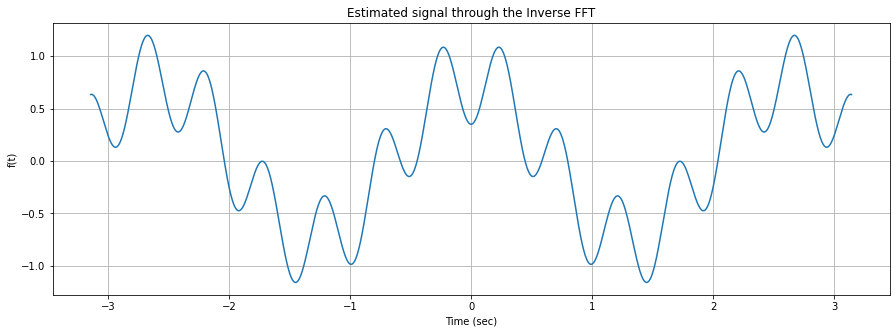

In [12]:
f_inv = np.fft.ifft(fft_f)

plt.plot(time, np.real(f_inv))
plt.title("Estimated signal through the Inverse FFT")
plt.xlabel("Time (sec)")
plt.ylabel("f(t)")
plt.grid()
plt.show()

# Verify Parseval

In the end , we can verify the Parseval formula

In [13]:
def squared_norm(func):
    return np.vdot(func,func)

In [14]:
norm_y = squared_norm(f)

print(norm_y)

2528.498811020167


In [15]:
norm_fft_f = 1/n*squared_norm(fft_f)

print(np.abs(norm_fft_f))

2528.498811020167
